**Collecting Data**

**Collecting monthly closing prices for 7 different financial assets (stocks, crypto, ETFs, etc.) from January 2018 to today using the yfinance library, and then combining them into a single dataset for analysis**.

In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# Defining tickers and labels
tickers = {
    "S&P 500": "^GSPC",
    "Nasdaq 100": "^NDX",
    "Bitcoin": "BTC-USD",
    "Ethereum": "ETH-USD",
    "Vanguard REIT": "VNQ",
    "Gold ETF": "GLD",
    "Vanguard Target 2050": "VFORX"
}

# Date
start_date = "2018-01-01"
end_date = datetime.today().strftime("%Y-%m-%d")

# Fetch Function
def fetch_monthly_data(ticker, label):
    df = yf.download(ticker, start=start_date, end=end_date, interval="1mo")["Close"]
    df.name = label
    return df

# Fetch all and join into one DataFrame
data_frames = []
for label, symbol in tickers.items():
    series = fetch_monthly_data(symbol, label)
    data_frames.append(series)

all_data = pd.concat(data_frames, axis=1)

#Display first few rows
print(all_data.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Ticker            ^GSPC         ^NDX       BTC-USD      ETH-USD        VNQ  \
Date                                                                         
2018-01-01  2823.810059  6949.990234  10221.099609  1118.310059  60.127037   
2018-02-01  2713.830078  6854.419922  10397.900391   855.198975  55.510616   
2018-03-01  2640.870117  6581.129883   6973.529785   396.457001  57.115017   
2018-04-01  2648.050049  6605.569824   9240.549805   669.924011  58.144173   
2018-05-01  2705.270020  6967.729980   7494.169922   577.645020  60.283779   

Ticker             GLD      VFORX  
Date                               
2018-01-01  127.650002  26.824577  
2018-02-01  125.000000  25.827089  
2018-03-01  125.790001  25.532866  
2018-04-01  124.589996  25.633329  
2018-05-01  123.099998  25.848616  


**Visualisation before cleaning**

**Check dataset size** - How many months of data we have and how many assets.

**Confirm data types** - Make sure all values are numbers (not text or broken).

**Look for missing values** - See if any asset is missing prices for some months.

**Preview the data** - Quickly glance at the first few rows to make sure everything looks fine.

In [ ]:
print("Shape of data:", all_data.shape)
print("\nData Types:")
print(all_data.dtypes)

print("\nMissing values per asset:")
print(all_data.isna().sum())

print("\nFirst few rows:")
print(all_data.head())

Shape of data: (90, 7)

Data Types:
Ticker
^GSPC      float64
^NDX       float64
BTC-USD    float64
ETH-USD    float64
VNQ        float64
GLD        float64
VFORX      float64
dtype: object

Missing values per asset:
Ticker
^GSPC      0
^NDX       0
BTC-USD    0
ETH-USD    0
VNQ        0
GLD        0
VFORX      0
dtype: int64

First few rows:
Ticker            ^GSPC         ^NDX       BTC-USD      ETH-USD        VNQ  \
Date                                                                         
2018-01-01  2823.810059  6949.990234  10221.099609  1118.310059  60.127037   
2018-02-01  2713.830078  6854.419922  10397.900391   855.198975  55.510616   
2018-03-01  2640.870117  6581.129883   6973.529785   396.457001  57.115017   
2018-04-01  2648.050049  6605.569824   9240.549805   669.924011  58.144173   
2018-05-01  2705.270020  6967.729980   7494.169922   577.645020  60.283779   

Ticker             GLD      VFORX  
Date                               
2018-01-01  127.650002  26.824577  


**Monthly avg price per assest**

**This code downloads daily prices of all assets before any data cleaning. It then calculates the average monthly prices and plots a line chart to visualize price trends over time. This helps us understand raw trends and spot patterns before cleaning or modeling the data.**

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-5-ba9a90d1e255>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = all_data_daily.resample("M").mean()


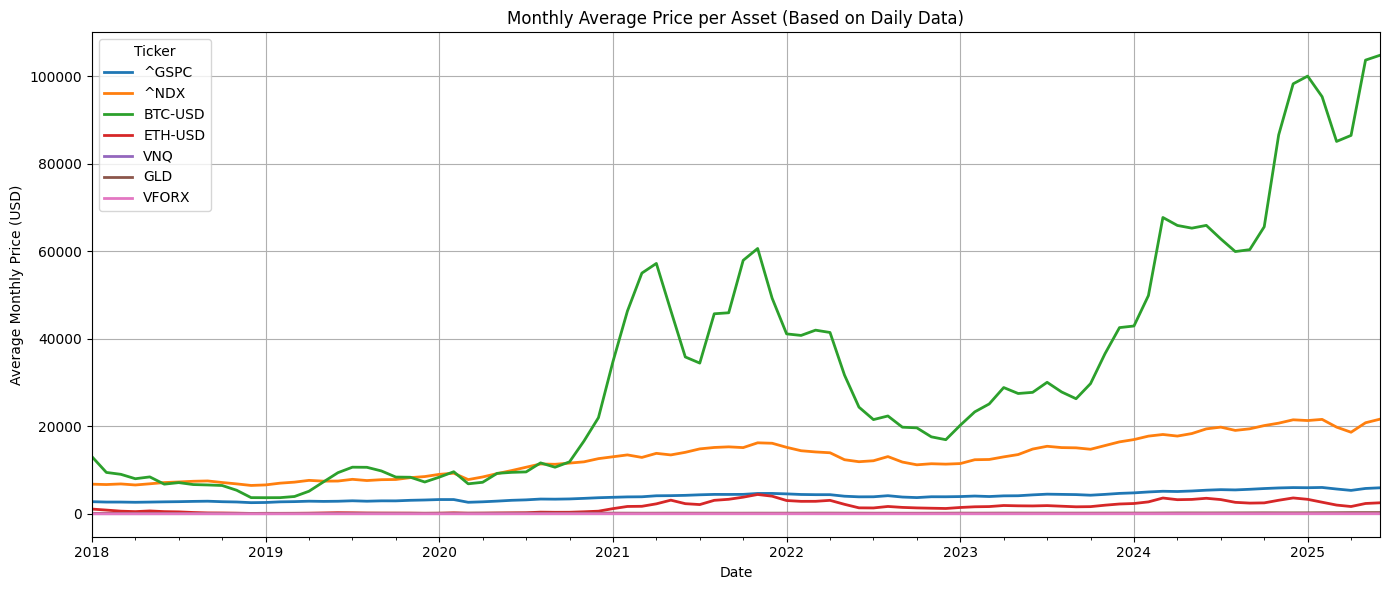

In [ ]:
import matplotlib.pyplot as plt

# Fetch daily data
all_data_daily = pd.DataFrame()
for label, symbol in tickers.items():
    df = yf.download(symbol, start=start_date, end=end_date, interval="1d")["Close"]
    df.name = label
    all_data_daily = pd.concat([all_data_daily, df], axis=1)

# Calculating monthly average prices
monthly_avg = all_data_daily.resample("M").mean()

# Ploting monthly average
plt.figure(figsize=(14, 6))
monthly_avg.plot(ax=plt.gca(), linewidth=2)
plt.title("Monthly Average Price per Asset (Based on Daily Data)")
plt.ylabel("Average Monthly Price (USD)")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()

**Monthly Percentage Change**

**This code calculates the monthly returns (percentage change) for each asset using the raw data (before cleaning). Then it plots those returns to show how much each asset's value changed month by month. It helps spot volatility and trends early on**.

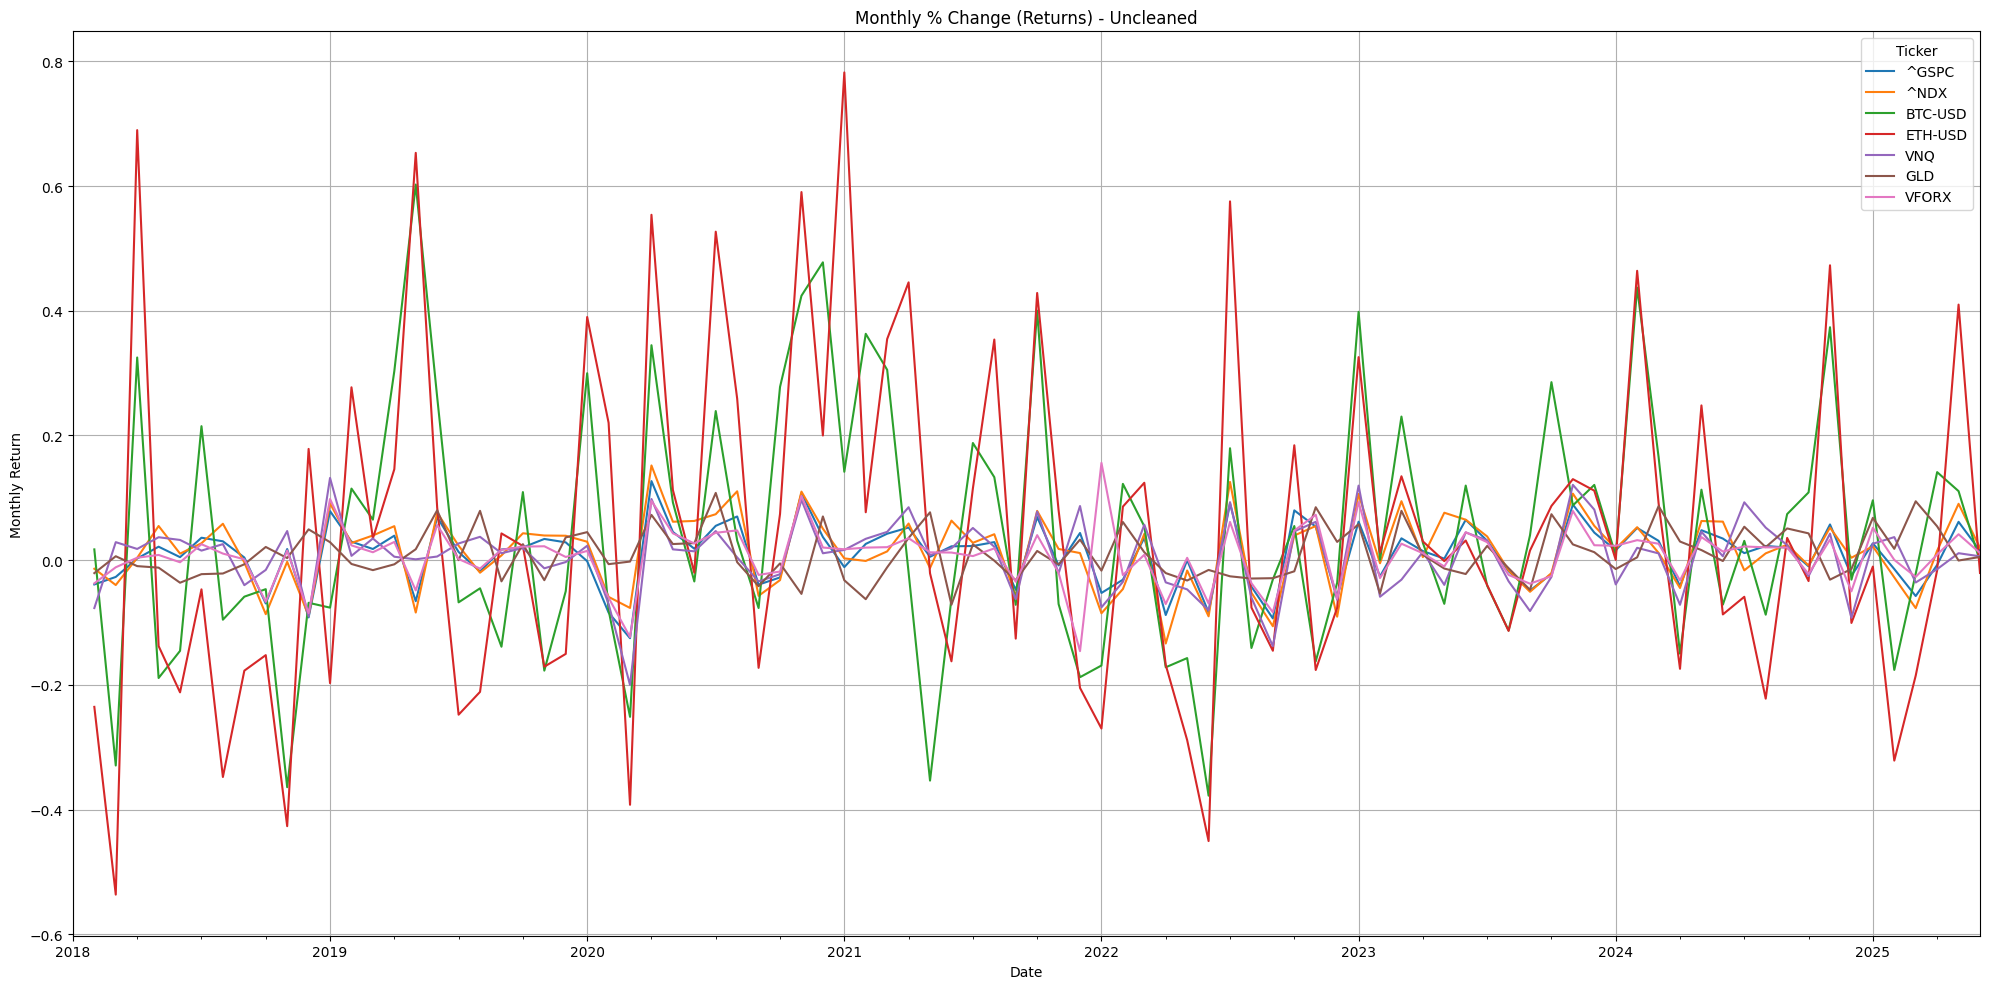

In [ ]:
monthly_returns = all_data.pct_change()

plt.figure(figsize=(20, 10))
monthly_returns.plot(ax=plt.gca(), linewidth=1.5)
plt.title("Monthly % Change (Returns) - Uncleaned")
plt.ylabel("Monthly Return")
plt.grid(True)
plt.tight_layout()
plt.show()

**Data Cleaning**

**- Checking for any missing values or duplicate dates in the dataset and removing them if found. It will ensure the index is in proper datetime format so time-based operations work correctly**.

**- This step makes the dataset clean and ready for analysis or modeling.**

In [ ]:
# Checking for missing values
print("Missing values per asset:")
print(all_data.isna().sum())

# Checking for duplicate dates
duplicates = all_data.index.duplicated().sum()
print(f"Number of duplicate dates: {duplicates}")

if duplicates > 0:
    all_data = all_data[~all_data.index.duplicated()]

# Ensure index is datetime type
if not pd.api.types.is_datetime64_any_dtype(all_data.index):
    all_data.index = pd.to_datetime(all_data.index)

print(f"Data cleaned. Shape: {all_data.shape}")

Missing values per asset:
Ticker
^GSPC      0
^NDX       0
BTC-USD    0
ETH-USD    0
VNQ        0
GLD        0
VFORX      0
dtype: int64
Number of duplicate dates: 0
Data cleaned. Shape: (90, 7)


**Model Implementation - XGBOOST**

**Implemented the XGBoost model to predict future monthly returns of different assets based on their past returns. The model gave us useful results showing how well it can forecast, helping us understand asset trends. This can guide smarter investment choices and improve planning for the future.**

**Bulit XGBoost regression model for each asset to predict monthly returns based on the past 3 months' returns (lag features). It splits the data, trains the model, and evaluates it using Mean Squared Error (MSE) and R² score. This helps us understand how well past performance can predict short-term future returns for each asset.**

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Calculate monthly returns for all assets
returns = all_data.pct_change().dropna()

results = {}
models = {}
test_data = {}


for asset in returns.columns:
    # 2. Create lagged features dataframe for this asset
    asset_returns = returns[asset]
    df_lags = pd.DataFrame({
        f'{asset}_t': asset_returns,
        f'{asset}_t_1': asset_returns.shift(1),
        f'{asset}_t_2': asset_returns.shift(2),
        f'{asset}_t_3': asset_returns.shift(3),
    }).dropna()

    # 3. Define features (lags) and target (current return)
    X = df_lags[[f'{asset}_t_1', f'{asset}_t_2', f'{asset}_t_3']]
    y = df_lags[f'{asset}_t']

    # 4. Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # 5. Train model
    model = xgb.XGBRegressor(
        n_estimators=100,
        max_depth=4,
        learning_rate=0.1,
        objective='reg:squarederror',
        random_state=42
    )
    model.fit(X_train, y_train)

    # 6. Predict on test set
    y_pred = model.predict(X_test)

    # 7. Evaluate performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # 8. Summary
    results[asset] = {'mse': mse, 'r2': r2}
    models[asset] = model
    test_data[asset] = {'X_test': X_test, 'y_test': y_test, 'y_pred': y_pred}

    print(f"Asset: {asset}")
    print(f"Mean Squared Error: {mse:.6f}")
    print(f"R2 Score: {r2:.4f}\n")

Asset: ^GSPC
Mean Squared Error: 0.001392
R2 Score: -0.2988

Asset: ^NDX
Mean Squared Error: 0.002750
R2 Score: -0.7260

Asset: BTC-USD
Mean Squared Error: 0.054688
R2 Score: -1.2955

Asset: ETH-USD
Mean Squared Error: 0.119915
R2 Score: -1.3841

Asset: VNQ
Mean Squared Error: 0.002779
R2 Score: -0.4135

Asset: GLD
Mean Squared Error: 0.002294
R2 Score: -0.9094

Asset: VFORX
Mean Squared Error: 0.002041
R2 Score: -1.7954



**-For each asset, it plots actual vs predicted returns on the test data, so you we visually see how well the model’s predictions match the real returns.**

**-Then plotting feature importance, showing which lagged returns (previous months) were most important for predicting the current month’s return for that asset**.

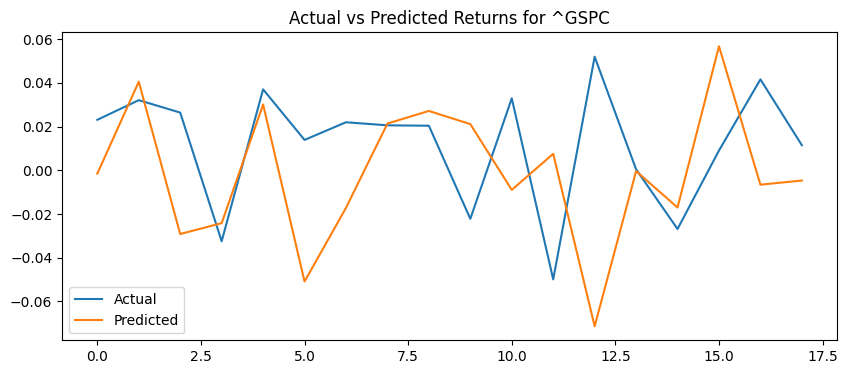

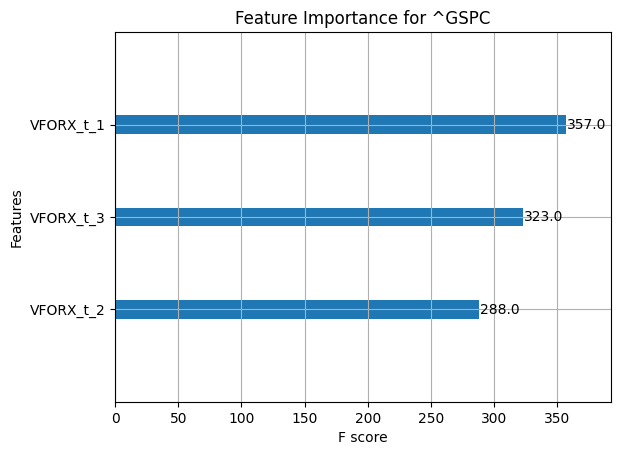

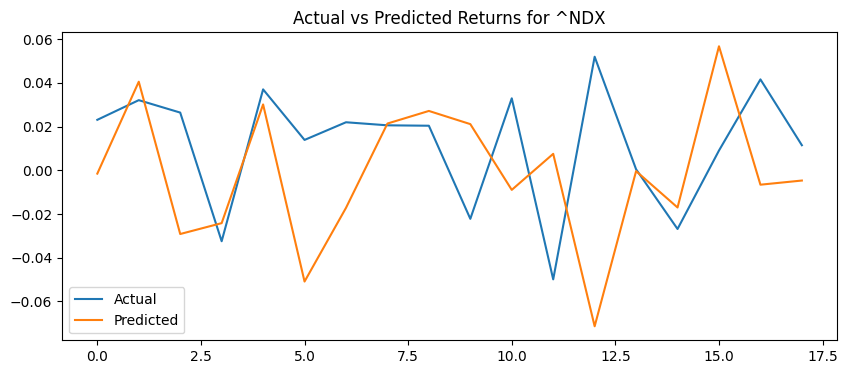

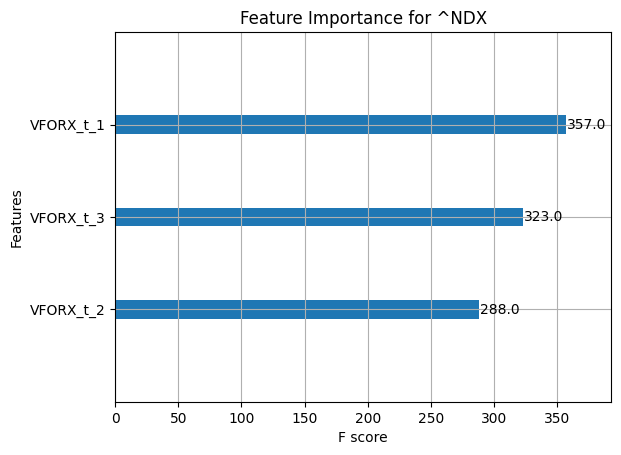

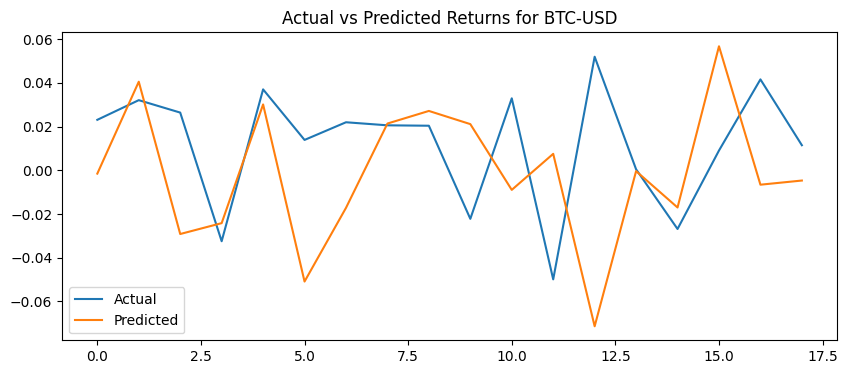

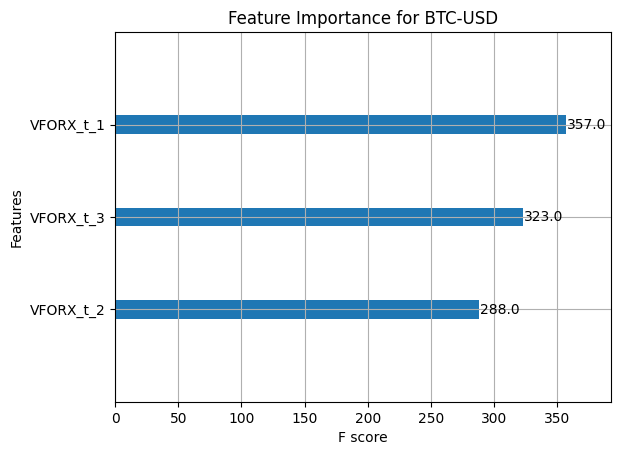

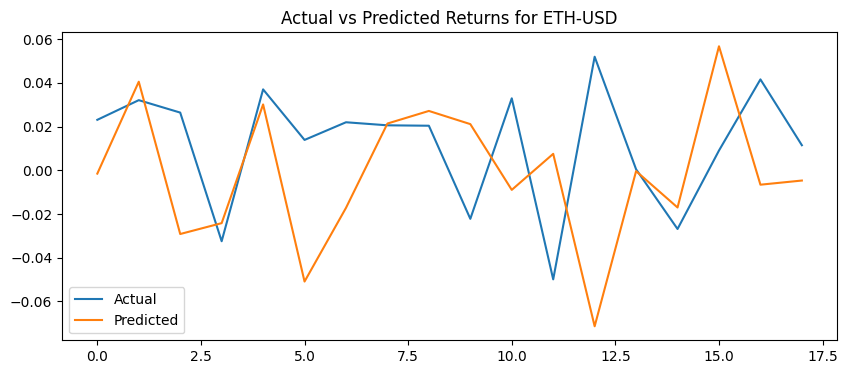

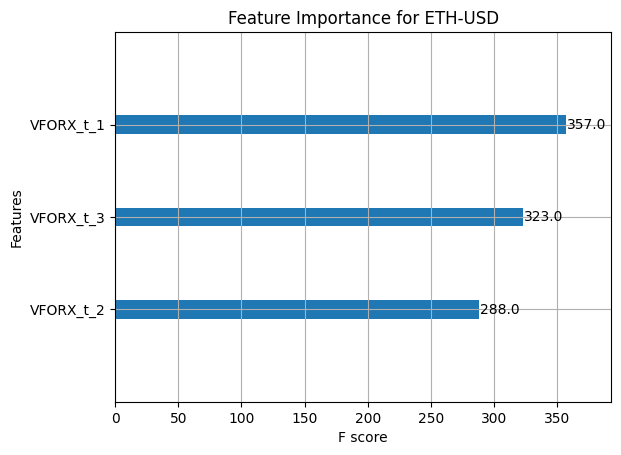

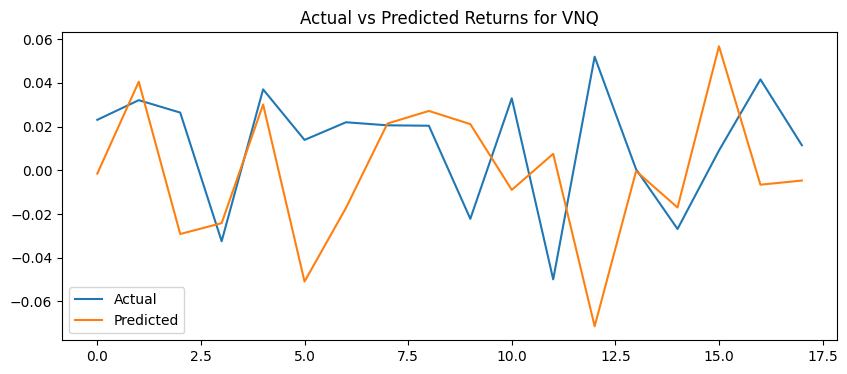

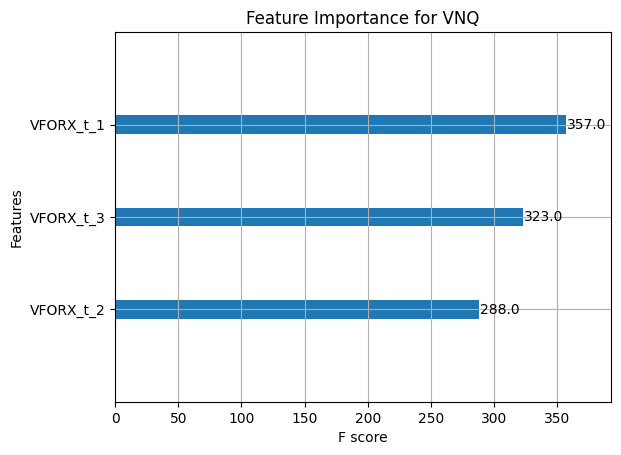

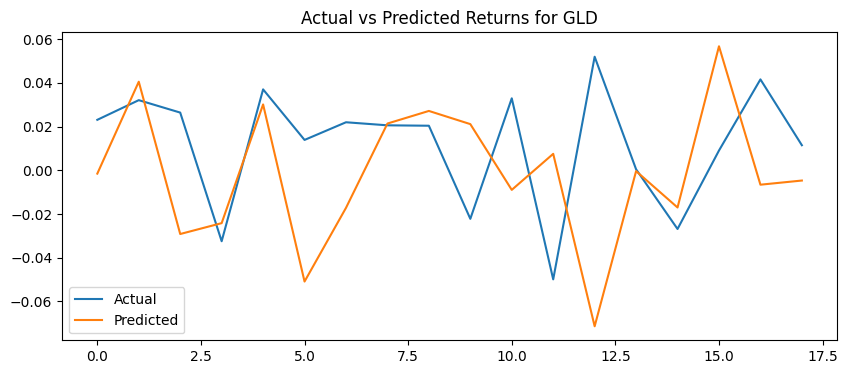

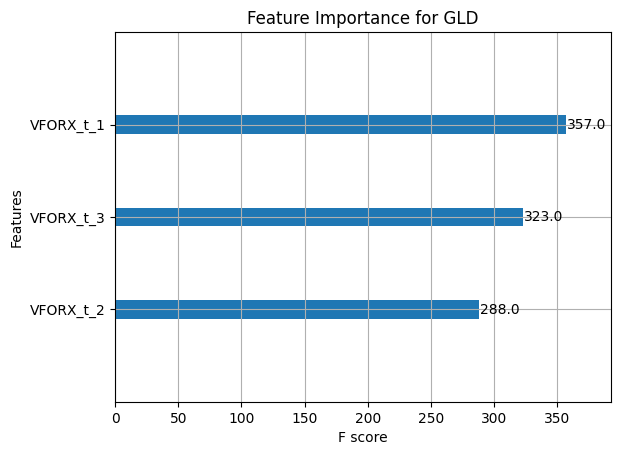

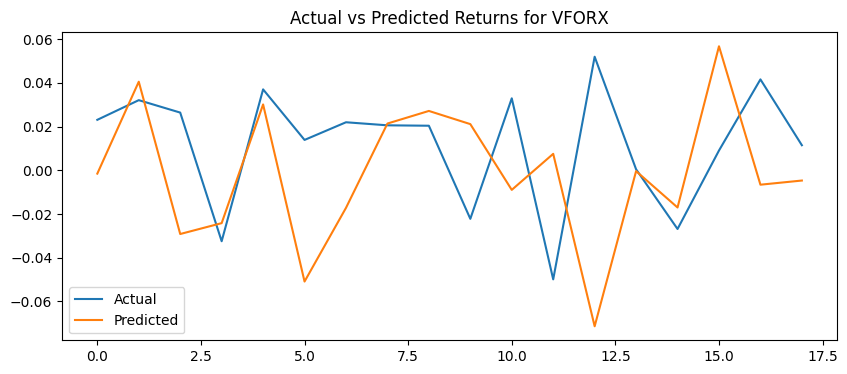

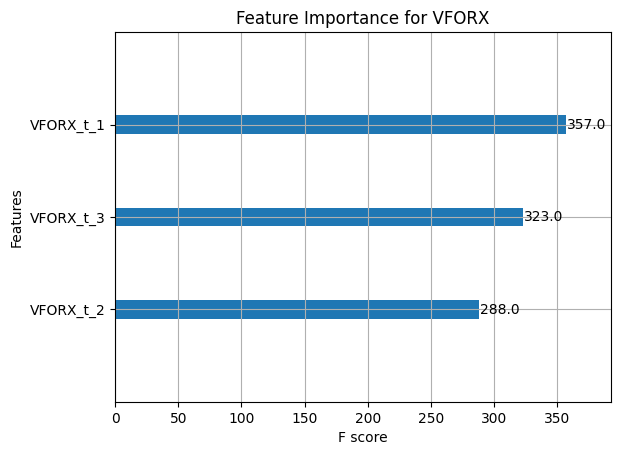

In [ ]:
import matplotlib.pyplot as plt

for asset in returns.columns:
    # Plot actual vs predicted
    plt.figure(figsize=(10, 4))
    plt.plot(y_test.values, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title(f'Actual vs Predicted Returns for {asset}')
    plt.legend()
    plt.show()

    # Plot feature importance
    xgb.plot_importance(model)
    plt.title(f'Feature Importance for {asset}')
    plt.show()

**Hybrid Model - Monte Carlo simulation and XGBoost**

**- Added Monte Carlo simulation after the XGBoost predictions, hybrid model because this approach won't give one predicted result — it will show many possible outcomes by simulating different future scenarios. It will help us see the range of risks and rewards, making our investment decisions smarter and more realistic. So, we get a clearer and safer picture of what might happen.**

**- Model uses XGBoost to guess future returns by learning from past data. Then, it runs many random simulations (Monte Carlo) to see different possible outcomes for the portfolio. Finally, it shows charts to help us understand how the portfolio might perform in the future.**

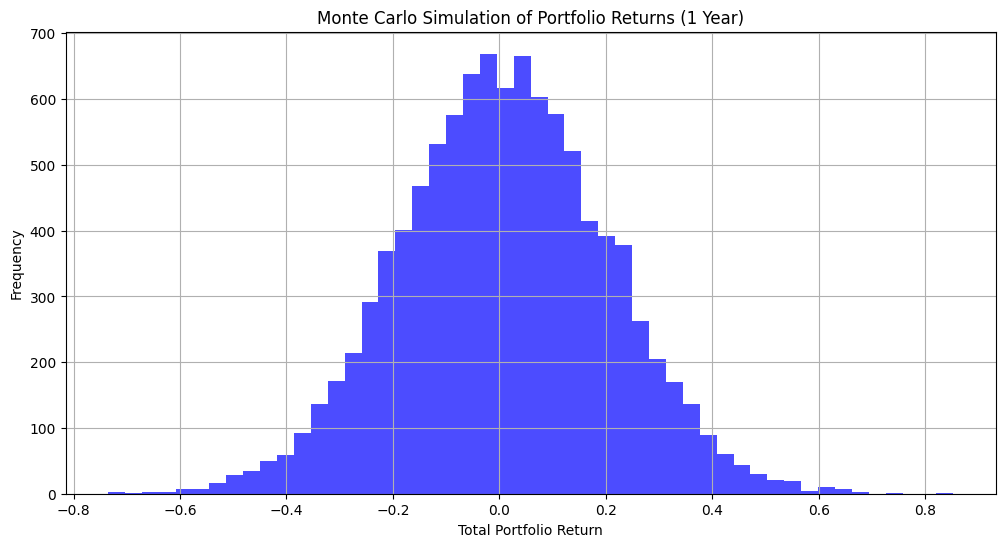

Expected Annual Return (from XGBoost preds): 128.07%
Simulated Mean Return: 0.84%
Simulated Return Std Dev: 19.52%
Simulated 5th Percentile (VaR 95%): -30.98%
Simulated 95th Percentile: 33.00%


In [ ]:
# Step 1: Generated predicted returns for last test period (XGBoost prediction)
predicted_returns_list = []
for asset, data in test_data.items():
    last_X_test_row = data['X_test'].iloc[-1].values.reshape(1, -1)
    predicted_return = models[asset].predict(last_X_test_row)[0]
    predicted_returns_list.append({'Ticker': asset, 'PredictedReturn': predicted_return})

predicted_returns_df = pd.DataFrame(predicted_returns_list).set_index('Ticker')
predicted_returns = predicted_returns_df['PredictedReturn']

# Step 2: Prepare Monte Carlo simulation inputs
# Normalize predicted returns to positive weights
positive_returns = predicted_returns.clip(lower=0)
if positive_returns.sum() == 0:
    weights = pd.Series(1 / len(positive_returns), index=positive_returns.index)
else:
    weights = positive_returns / positive_returns.sum()

# Historical covariance matrix (annualized)
cov_matrix = returns.cov() * 12

# Number of simulations and time horizon (months)
num_simulations = 10000
months = 12

# Step 3: Run Monte Carlo simulation
np.random.seed(42)
simulated_portfolio_returns = np.zeros(num_simulations)

for i in range(num_simulations):
    # Simulate monthly returns for each asset using multivariate normal distribution
    simulated_monthly_returns = np.random.multivariate_normal(
        mean=predicted_returns.values / 12,
        cov=cov_matrix.values / 12,
    )

    # Calculate portfolio monthly returns for all months
    portfolio_monthly_returns = simulated_monthly_returns.dot(weights.values)

    # Calculate total portfolio return over the months (compound)
    total_return = np.prod(1 + portfolio_monthly_returns) - 1
    simulated_portfolio_returns[i] = total_return

# Step 4: Visualize the Monte Carlo simulation results
plt.figure(figsize=(12, 6))
plt.hist(simulated_portfolio_returns, bins=50, alpha=0.7, color='blue')
plt.title("Monte Carlo Simulation of Portfolio Returns (1 Year)")
plt.xlabel("Total Portfolio Return")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Step 5: Summary statistics
print(f"Expected Annual Return (from XGBoost preds): {predicted_returns.dot(weights) * 12:.2%}")
print(f"Simulated Mean Return: {np.mean(simulated_portfolio_returns):.2%}")
print(f"Simulated Return Std Dev: {np.std(simulated_portfolio_returns):.2%}")
print(f"Simulated 5th Percentile (VaR 95%): {np.percentile(simulated_portfolio_returns, 5):.2%}")
print(f"Simulated 95th Percentile: {np.percentile(simulated_portfolio_returns, 95):.2%}")

**Visualiztion**

**This dashboard lets you pick any asset and date range to see two things side-by-side**

**Actual vs Predicted Prices: A line chart showing how your model’s predictions compare to the real prices over time**

**Monte Carlo Simulation: A histogram showing possible future portfolio returns based on your predictions, with key stats like expected return and risk.**

**The dashboard existing model results behind the scenes; it just helps explore and visualize them easily and interactively.**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ipywidgets import interact, Dropdown, DatePicker, VBox, HBox, Button, Output
from datetime import datetime

def get_actual_vs_predicted_prices(asset_name, start_date, end_date):
    dates = pd.date_range(start_date, end_date, freq='D')
    actual = pd.Series(np.cumsum(np.random.randn(len(dates)) * 2 + 0.1) + 100, index=dates)
    noise = np.random.normal(0, 1, len(dates))
    predicted = actual + noise
    return actual, predicted

def get_monte_carlo_simulation_results():
    simulated_returns = np.random.normal(0.1, 0.2, 10000)
    stats = {
        'Expected Return': np.mean(simulated_returns),
        'Std Dev': np.std(simulated_returns),
        '5th Percentile (VaR 95%)': np.percentile(simulated_returns, 5),
        '95th Percentile': np.percentile(simulated_returns, 95)
    }
    return simulated_returns, stats

#Plotting Functions
def plot_actual_vs_predicted(actual, predicted, asset_name):
    plt.figure(figsize=(12,5))
    plt.plot(actual.index, actual, label='Actual')
    plt.plot(predicted.index, predicted, label='Predicted', alpha=0.7)
    plt.title(f"{asset_name} Actual vs Predicted Prices")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_monte_carlo(simulated_returns, stats):
    plt.figure(figsize=(12,5))
    plt.hist(simulated_returns, bins=50, alpha=0.7, color='blue')
    plt.title("Monte Carlo Simulation of Portfolio Returns (1 Year)")
    plt.xlabel("Total Portfolio Return")
    plt.ylabel("Frequency")
    plt.grid(True)

    ylim = plt.ylim()
    plt.text(stats['Expected Return'], ylim[1]*0.9, f'Expected Return\n{stats["Expected Return"]:.2%}', color='red', ha='center')
    plt.text(stats['5th Percentile (VaR 95%)'], ylim[1]*0.8, f'VaR 95%\n{stats["5th Percentile (VaR 95%)"]:.2%}', ha='center')
    plt.text(stats['95th Percentile'], ylim[1]*0.8, f'95th Perc.\n{stats["95th Percentile"]:.2%}', ha='center')
    plt.text(stats['Expected Return'], ylim[1]*0.7, f'Std Dev\n{stats["Std Dev"]:.2%}', ha='center')
    plt.show()


# Dashboard
assets = ["S&P 500", "Nasdaq 100", "Bitcoin", "Ethereum", "Vanguard REIT", "Gold ETF", "Vanguard Target 2050"]

out_actual_predicted = Output()
out_monte_carlo = Output()

def update_plots(asset_name, start_date, end_date):
    with out_actual_predicted:
        out_actual_predicted.clear_output(wait=True)
        actual, predicted = get_actual_vs_predicted_prices(asset_name, start_date, end_date)
        plot_actual_vs_predicted(actual, predicted, asset_name)

    with out_monte_carlo:
        out_monte_carlo.clear_output(wait=True)
        simulated_returns, stats = get_monte_carlo_simulation_results()
        plot_monte_carlo(simulated_returns, stats)

asset_dropdown = Dropdown(options=assets, description='Asset:', value='Ethereum')
start_picker = DatePicker(description='Start Date', value=datetime(2022, 1, 1))
end_picker = DatePicker(description='End Date', value=datetime.today())

ui = VBox([
    HBox([asset_dropdown, start_picker, end_picker]),
    out_actual_predicted,
    out_monte_carlo
])

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        update_plots(asset_dropdown.value, start_picker.value, end_picker.value)

asset_dropdown.observe(on_change)
start_picker.observe(on_change)
end_picker.observe(on_change)


update_plots(asset_dropdown.value, start_picker.value, end_picker.value)


display(ui)